Solving time-dependent Schrodinger equation using method [explained here](https://static.uni-graz.at/fileadmin/_Persoenliche_Webseite/puschnig_peter/unigrazform/Theses/BachelorThesis_Wachter_2017.pdf) with $\psi(0,t)=\psi(L,t)=0$ boundary conditions (infinitely deep potential well)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse as spa
from scipy.sparse.linalg import splu
from tqdm import trange

$$\bar E=E/E_0,\quad E_0=\hbar/2mL^2$$
$$\bar x=x/L$$
$$\bar t=t/t_0,\quad t_0=2mL^2/\hbar$$

In [2]:
def schrodinger_solver(L,dt,nsteps,V,psi0):
    N=psi0.shape[0]
    x=np.linspace(0,L,N)
    dx=x[1]-x[0]
    v=np.zeros(N,complex)
    for j in range(N):
        v[j]=V(x[j])
    plt.plot(v)
    diags=np.array([-1,0,1])
    o=np.ones((N),complex)
    alp=(1j)*dt/(2*dx**2)*o
    xi=o+1j*dt/2*(2/(dx*dx)*o+v)
    vecs1=np.array([-alp,xi,-alp])
    U1=spa.spdiags(vecs1,diags,N,N)
    U1 =U1.tocsc()
    
    
    gam=o-1j*dt/2*(2/(dx*dx)*o+v)
    vecs2=np.array([alp,gam,alp])
    U2=spa.spdiags(vecs2,diags,N,N)
    U2 =U2.tocsc()
    PSI=np.zeros((N,nsteps),complex)
    PSI[:,0] =psi0
    LU=spa.linalg.splu(U1)
    for n in range(0,nsteps-1):
        b=U2.dot(PSI[:,n])
        PSI[:,n+1]=LU.solve(b)
    return PSI


def V_infpit(x):#v=V*2mL^2/h
    return 0

def barrier(x):
    if x<15 and x>10:
        return -20
    else:
        return 0

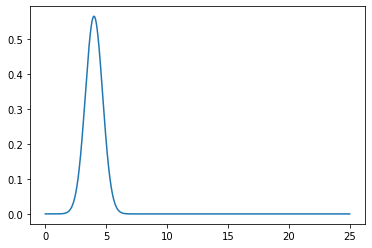

In [3]:
init=np.zeros(5000,dtype='complex')
x=np.linspace(0,25,5000)
for i in range(5000):
    init[i]=np.exp(1j*(1)*x[i]-(x[i]-4)*(x[i]-4)/2)/np.sqrt(1.772453837)
init[0]=0
init[-1]=0
plt.plot(x,np.abs(init)**2)

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


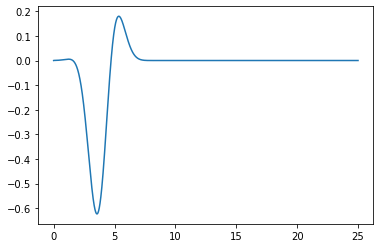

In [4]:
plt.plot(x,init)

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


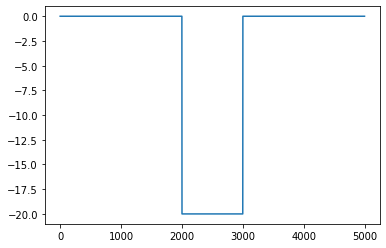

In [5]:
res = schrodinger_solver(25,0.01,2000,barrier,init)#
#res2 = schrodinger_solver(20,0.01,2000,V_infpit,init)

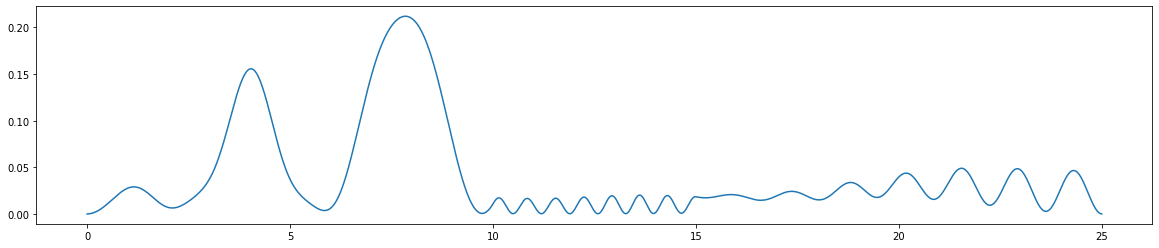

In [6]:
fig, ax = plt.subplots()
fig.set_figwidth(20)
ax.plot(x,np.abs(res[::,400])**2)
#plt.plot(x,np.abs(res2[::,200])**2)

In [7]:
import moviepy.editor as mpe

In [8]:
clips = []
for i in trange(2000):
    fig, ax = plt.subplots()
    fig.set_figwidth(20)
    ax.plot(x,np.abs(res[::,i])**2)
    #ax.plot(x,np.abs(res2[::,i])**2)
    fig.canvas.draw()
    c=np.array(fig.canvas.renderer.buffer_rgba())
    clips.append(mpe.ImageClip(c,duration=1/48))
    plt.close('all')
                 
vid = mpe.concatenate_videoclips(clips)
vid.write_videofile("psi_0Vk=1+stationary4k.mp4", fps=24, audio = False)

100%|██████████████████████████████████████████████████████████████████████████████| 2000/2000 [02:05<00:00, 15.91it/s]


Moviepy - Building video psi_0Vk=1+stationary4k.mp4.
Moviepy - Writing video psi_0Vk=1+stationary4k.mp4



Moviepy - Done !
Moviepy - video ready psi_0Vk=1+stationary4k.mp4
